# Homework

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

    b) plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    c) Discuss the complexity of each method.

    d) For graduate students who have projects: read the paper, and provide a short summary about your project

In [26]:
import time
import numpy as np

# a) 
# Recursion 
def fib1(n):      
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib1(n-1)+fib1(n-2)

# Tabulation
def fib2(n):
    table=[0]*(n+1)
    table[1] = 1
    for i in range(2,n+1):
        table[i]= table[i-1] + table[i-2]        
    return table[n]

# Matrix
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib3(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f

n1 = [2, 10, 20, 40]
n2 = [2, 10, 20, 40, 100, 1000, 10000]
fib1_times = []
fib2_times = []
fib3_times = []
for i in n1:
    start_time = time.time()
    ans = fib1(i)
    tot_time = time.time() - start_time
    print(i, ans)
    print("--- %s seconds ---" % (tot_time))
    fib1_times.append(tot_time)
for i in n2:
    start_time = time.time()
    ans = fib2(i)
    tot_time = time.time() - start_time
    print(i, ans)
    print("--- %s seconds ---" % (tot_time))
    fib2_times.append(tot_time)
for i in n2:
    start_time = time.time()
    ans = fib3(i)
    tot_time = time.time() - start_time
    print(i, ans)
    print("--- %s seconds ---" % (tot_time))
    fib3_times.append(tot_time)

2 1
--- 1.9073486328125e-06 seconds ---
10 55
--- 3.4809112548828125e-05 seconds ---
20 6765
--- 0.0029151439666748047 seconds ---
40 102334155
--- 45.92819690704346 seconds ---
2 1
--- 6.9141387939453125e-06 seconds ---
10 55
--- 3.814697265625e-06 seconds ---
20 6765
--- 5.9604644775390625e-06 seconds ---
40 102334155
--- 8.106231689453125e-06 seconds ---
100 354224848179261915075
--- 2.09808349609375e-05 seconds ---
1000 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875
--- 0.00022602081298828125 seconds ---
10000 33644764876431783266621612005107543310302148460680063906564769974680081442166662368155595513633734025582065332680836159373734790483865268263040892463056431887354544369559827491606602099884183933864652731300088830269235673613135117579297437854413752130520504347701602264758318906527890855154366159582987279682987510631

[] [1.9073486328125e-06, 3.4809112548828125e-05, 0.0029151439666748047, 45.92819690704346]


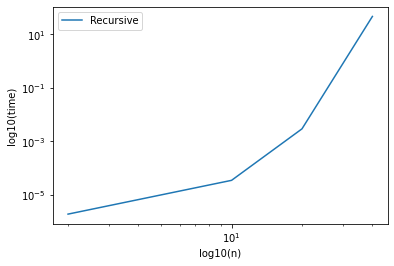

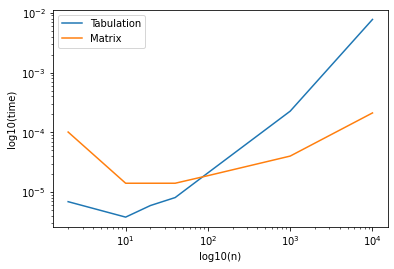

In [29]:
import matplotlib.pyplot as plt

# b)
print(fib1_results, fib1_times)
plt.figure()
plt.loglog(n1, fib1_times, label='Recursive')
plt.legend()
plt.xlabel('log10(n)')
plt.ylabel('log10(time)')

plt.figure()
plt.loglog(n2, fib2_times, label='Tabulation')
plt.loglog(n2, fib3_times, label='Matrix')
plt.legend()
plt.xlabel('log10(n)')
plt.ylabel('log10(time)')

plt.show()

c)
Recursion method time complexity is O(2^n) and the time it takes to calculate the Fibonacci number quickly blows up. It is a very inefficient method with reduntant calculations and self-calls of the function.

Tabulation method time complexity is O(n). It is a simple and efficient method to calculate the Fibonacci number.

Matrix method time complexity is O(log n). It is the quickest way to calculate extremely large Fibonacci numbers. The method is not as simple to describe as the tabulation method but is by far the quickest.
